## se carga dataset

In [93]:
from pandas import DataFrame
import pandas as pd
from sklearn import datasets


dataset = pd.read_csv('iris.csv')
dataset.head(6)

,a,b,c,d,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


## se necesita convertir la última columna a valor número, para eso se utiliza LabelEncoder

In [94]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(dataset['class'])
last_column_numeric = lb.transform(dataset['class'])
last_column_numeric


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## una vez convertido, se elimina la columa de string y se agrega la nueva columna de valores numéricos

In [95]:
dataset.drop(columns='class', inplace=True)
dataset['group'] = last_column_numeric
dataset.head(5)

,a,b,c,d,group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## convertimos a csv el nuevo data frame

In [96]:
dataset.to_csv('iris_numeric.csv')

## agregamos las ventanas para las series de tiempo y calculamos la media de cada columna

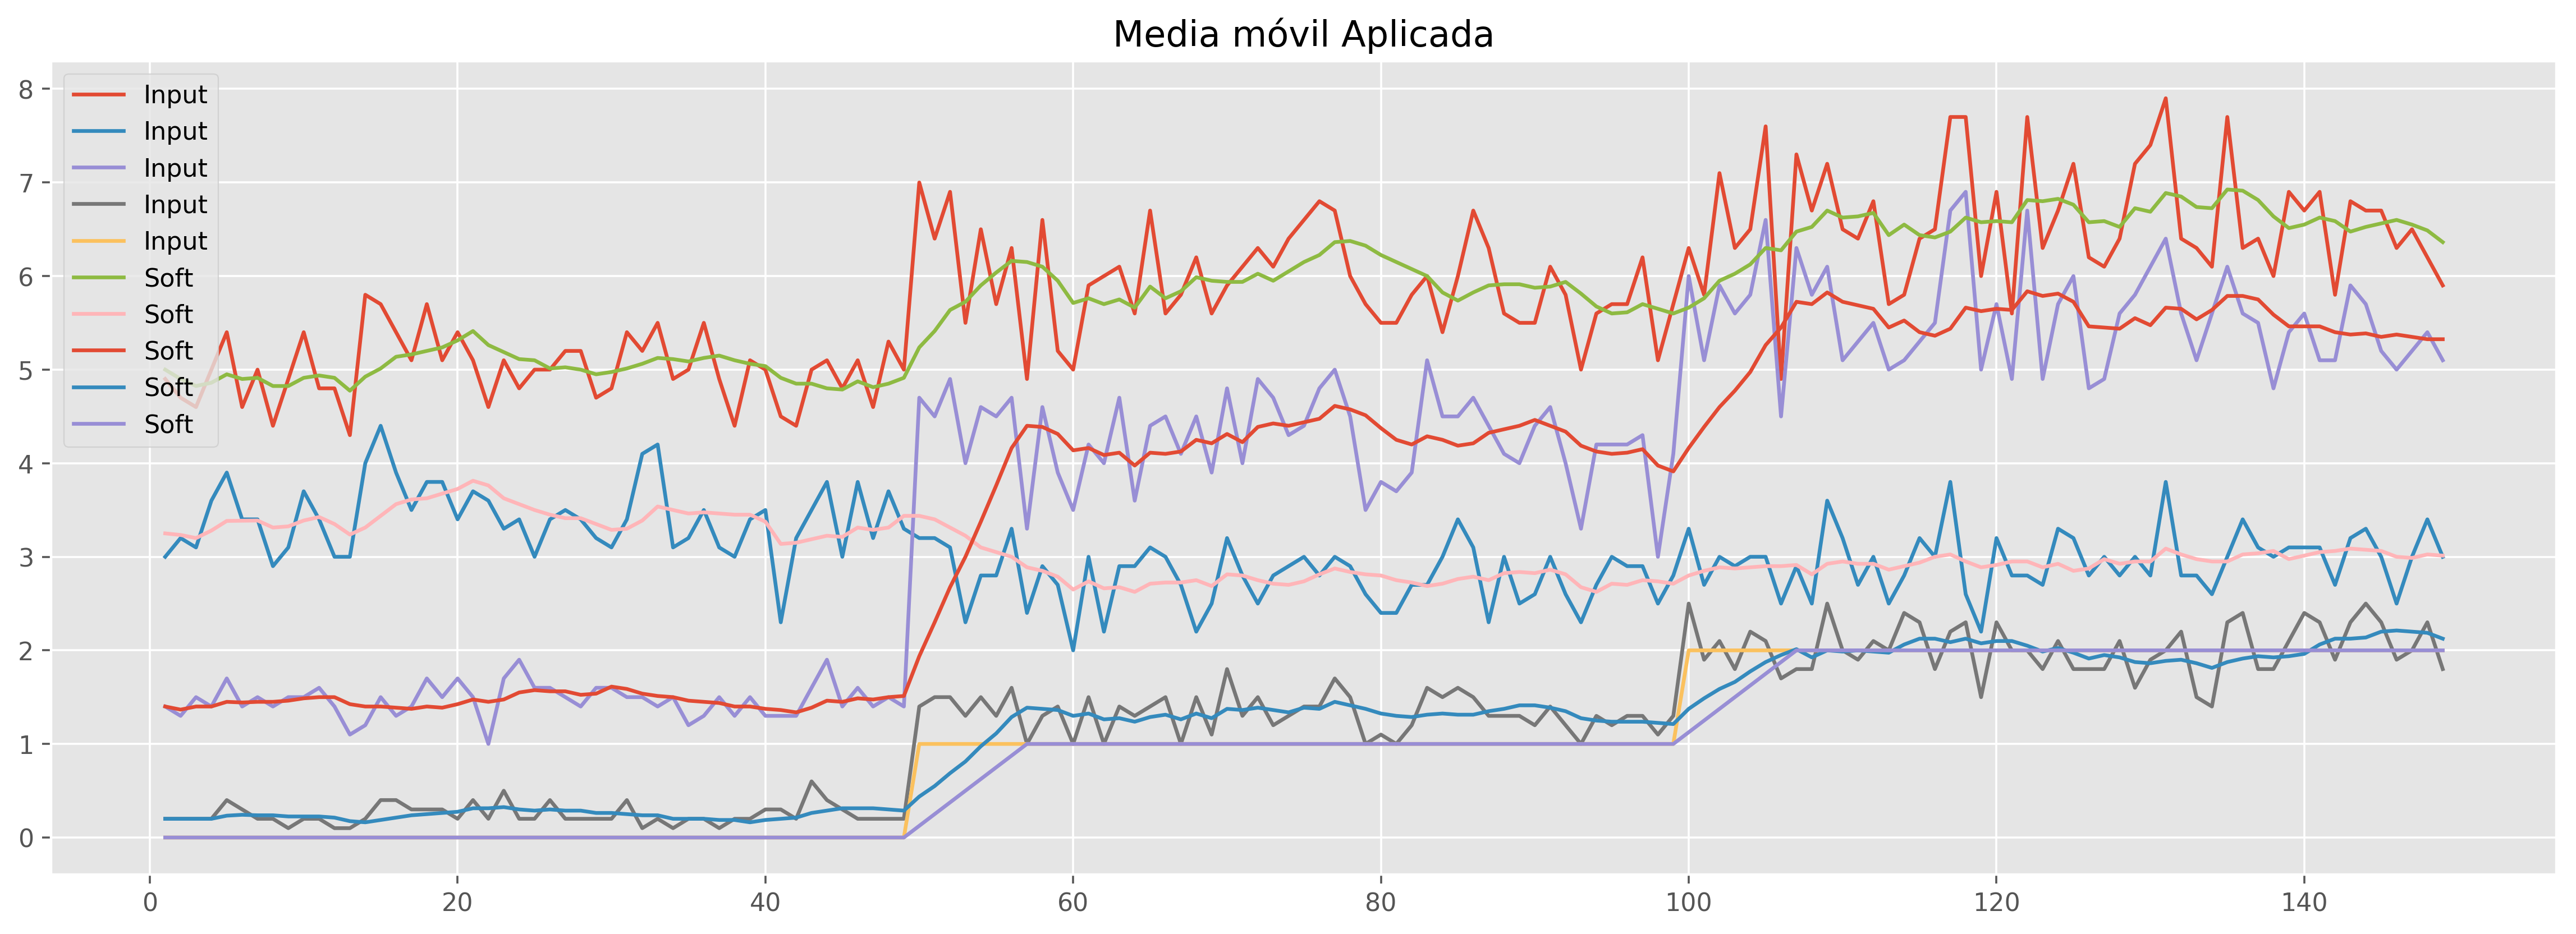

In [97]:
from matplotlib import pyplot

dataset_soft = dataset.rolling(window=8, min_periods=1).mean()

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150], label='Input')
pyplot.plot(dataset_soft[1:150], label='Soft')
pyplot.title('Media móvil Aplicada')
pyplot.legend()
pyplot.show()

## Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado de la red

In [98]:
import Tools as tls

size = 5

dataset_serialized = tls.series_to_supervised(dataset_soft,size, n_out=1, dropnan = True)
dataset_serialized.head(10)

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
5,5.1000,3.500000,1.400000,0.200000,0.0,5.0000,3.250000,1.400000,0.200000,0.0,...,4.8600,3.280000,1.400000,0.200000,0.0,4.9500,3.383333,1.450000,0.233333,0.0
6,5.0000,3.250000,1.400000,0.200000,0.0,4.9000,3.233333,1.366667,0.200000,0.0,...,4.9500,3.383333,1.450000,0.233333,0.0,4.9000,3.385714,1.442857,0.242857,0.0
7,4.9000,3.233333,1.366667,0.200000,0.0,4.8250,3.200000,1.400000,0.200000,0.0,...,4.9000,3.385714,1.442857,0.242857,0.0,4.9125,3.387500,1.450000,0.237500,0.0
8,4.8250,3.200000,1.400000,0.200000,0.0,4.8600,3.280000,1.400000,0.200000,0.0,...,4.9125,3.387500,1.450000,0.237500,0.0,4.8250,3.312500,1.450000,0.237500,0.0
9,4.8600,3.280000,1.400000,0.200000,0.0,4.9500,3.383333,1.450000,0.233333,0.0,...,4.8250,3.312500,1.450000,0.237500,0.0,4.8250,3.325000,1.462500,0.225000,0.0
10,4.9500,3.383333,1.450000,0.233333,0.0,4.9000,3.385714,1.442857,0.242857,0.0,...,4.8250,3.325000,1.462500,0.225000,0.0,4.9125,3.387500,1.487500,0.225000,0.0
11,4.9000,3.385714,1.442857,0.242857,0.0,4.9125,3.387500,1.450000,0.237500,0.0,...,4.9125,3.387500,1.487500,0.225000,0.0,4.9375,3.425000,1.500000,0.225000,0.0
12,4.9125,3.387500,1.450000,0.237500,0.0,4.8250,3.312500,1.450000,0.237500,0.0,...,4.9375,3.425000,1.500000,0.225000,0.0,4.9125,3.350000,1.500000,0.212500,0.0
13,4.8250,3.312500,1.450000,0.237500,0.0,4.8250,3.325000,1.462500,0.225000,0.0,...,4.9125,3.350000,1.500000,0.212500,0.0,4.7750,3.237500,1.425000,0.175000,0.0
14,4.8250,3.325000,1.462500,0.225000,0.0,4.9125,3.387500,1.487500,0.225000,0.0,...,4.7750,3.237500,1.425000,0.175000,0.0,4.9250,3.312500,1.400000,0.162500,0.0


## se normalizan datos entre 0 y 1

In [99]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm)

           0         1         2         3    4         5         6   \
0    0.151163  0.736842  0.013889  0.018987  0.0  0.104651  0.526316   
1    0.104651  0.526316  0.013889  0.018987  0.0  0.058140  0.512281   
2    0.058140  0.512281  0.006481  0.018987  0.0  0.023256  0.484211   
3    0.023256  0.484211  0.013889  0.018987  0.0  0.039535  0.551579   
4    0.039535  0.551579  0.013889  0.018987  0.0  0.081395  0.638596   
5    0.081395  0.638596  0.025000  0.035865  0.0  0.058140  0.640602   
6    0.058140  0.640602  0.023413  0.040687  0.0  0.063953  0.642105   
7    0.063953  0.642105  0.025000  0.037975  0.0  0.023256  0.578947   
8    0.023256  0.578947  0.025000  0.037975  0.0  0.023256  0.589474   
9    0.023256  0.589474  0.027778  0.031646  0.0  0.063953  0.642105   
10   0.063953  0.642105  0.033333  0.031646  0.0  0.075581  0.673684   
11   0.075581  0.673684  0.036111  0.031646  0.0  0.063953  0.610526   
12   0.063953  0.610526  0.036111  0.025316  0.0  0.000000  0.51

## preparamos los datos

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

X_test_noshape = X_test

print(X_train.shape, y_train.shape) 

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

print(X_train.shape, y_train.shape) 

(116, 29) (116, 1)
(116, 1, 29) (116, 1, 1)


## preparamos el modelo

In [12]:
!pip install keras

    100% |████████████████████████████████| 317kB 98kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 4.9MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.


In [14]:
!pip install tensorflow

    100% |████████████████████████████████| 83.1MB 86kB/s eta 0:00:01    24% |███████▉                        | 20.4MB 140kB/s eta 0:07:27    28% |█████████▏                      | 23.9MB 174kB/s eta 0:05:40    50% |████████████████▎               | 42.3MB 189kB/s eta 0:03:36    57% |██████████████████▌             | 48.0MB 281kB/s eta 0:02:05    60% |███████████████████▌            | 50.6MB 299kB/s eta 0:01:49    62% |████████████████████▏           | 52.3MB 210kB/s eta 0:02:27    63% |████████████████████▎           | 52.6MB 252kB/s eta 0:02:01    64% |████████████████████▊           | 53.7MB 98kB/s eta 0:05:00    65% |█████████████████████           | 54.6MB 157kB/s eta 0:03:01    65% |█████████████████████▏          | 54.8MB 196kB/s eta 0:02:25    69% |██████████████████████▎         | 57.8MB 192kB/s eta 0:02:12    69% |██████████████████████▎         | 57.8MB 197kB/s eta 0:02:08    77% |████████████████████████▊       | 64.1MB 312kB/s eta 0:01:01    78% |█████████████████████████▏

In [129]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(8, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # importante declarar correctamente shape
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

## etrenamos el algoritmo

In [130]:
history = model.fit(X_train, y_train, epochs=50, batch_size=24, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Train on 116 samples, validate on 29 samples
Epoch 1/50
116/116 [==============================] - 3s 25ms/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 2/50
116/116 [==============================] - 0s 626us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 3/50
116/116 [==============================] - 0s 946us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 4/50
116/116 [==============================] - 0s 1ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 5/50
116/116 [==============================] - 0s 795us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 6/50
116/116 [==============================] - 0s 719us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0090 - val_m

116/116 [==============================] - 0s 524us/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


## graficamos

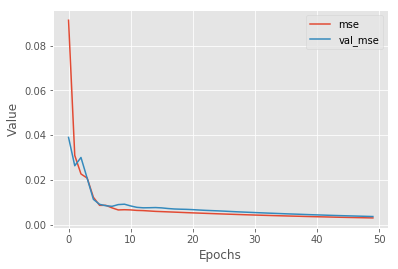

In [131]:
pyplot.style.use("ggplot")
pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.plot(history.history['val_mean_squared_error'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

## realizamos prediccion

In [132]:
predictions = model.predict(X_test, 10, verbose=2)
predicted = predictions.transpose(2,0,1).reshape(-1,predictions.shape[1])
y_test = y_test.transpose(2,0,1).reshape(-1,y_test.shape[1])
predicted

array([[ 0.5868483 ],
       [-0.01691114],
       [-0.00352545],
       [ 0.9534357 ],
       [ 0.35738897],
       [ 0.05207425],
       [ 0.573951  ],
       [ 0.0052329 ],
       [ 0.9592846 ],
       [ 0.5471502 ],
       [ 0.00803529],
       [ 0.9551212 ],
       [ 0.9853998 ],
       [ 0.59266007],
       [ 0.03835941],
       [ 0.6274288 ],
       [ 0.4199177 ],
       [ 0.9611711 ],
       [-0.00322041],
       [ 0.51794153],
       [ 0.5471048 ],
       [ 0.6056195 ],
       [ 0.59407   ],
       [ 0.60024637],
       [-0.02191063],
       [ 0.6273659 ],
       [-0.01467667],
       [ 1.0030335 ],
       [ 0.9510011 ]], dtype=float32)

In [133]:
predicted - y_test

array([[ 0.08684832],
       [-0.01691114],
       [-0.00352545],
       [-0.04656428],
       [-0.01761103],
       [ 0.05207425],
       [ 0.07395101],
       [ 0.0052329 ],
       [-0.0407154 ],
       [ 0.04715019],
       [ 0.00803529],
       [-0.04487878],
       [-0.01460022],
       [ 0.09266007],
       [ 0.03835941],
       [-0.12257117],
       [-0.0175823 ],
       [-0.03882891],
       [-0.00322041],
       [ 0.01794153],
       [ 0.04710478],
       [ 0.10561949],
       [ 0.09407002],
       [ 0.10024637],
       [-0.02191063],
       [ 0.12736589],
       [-0.01467667],
       [ 0.00303352],
       [-0.04899889]])

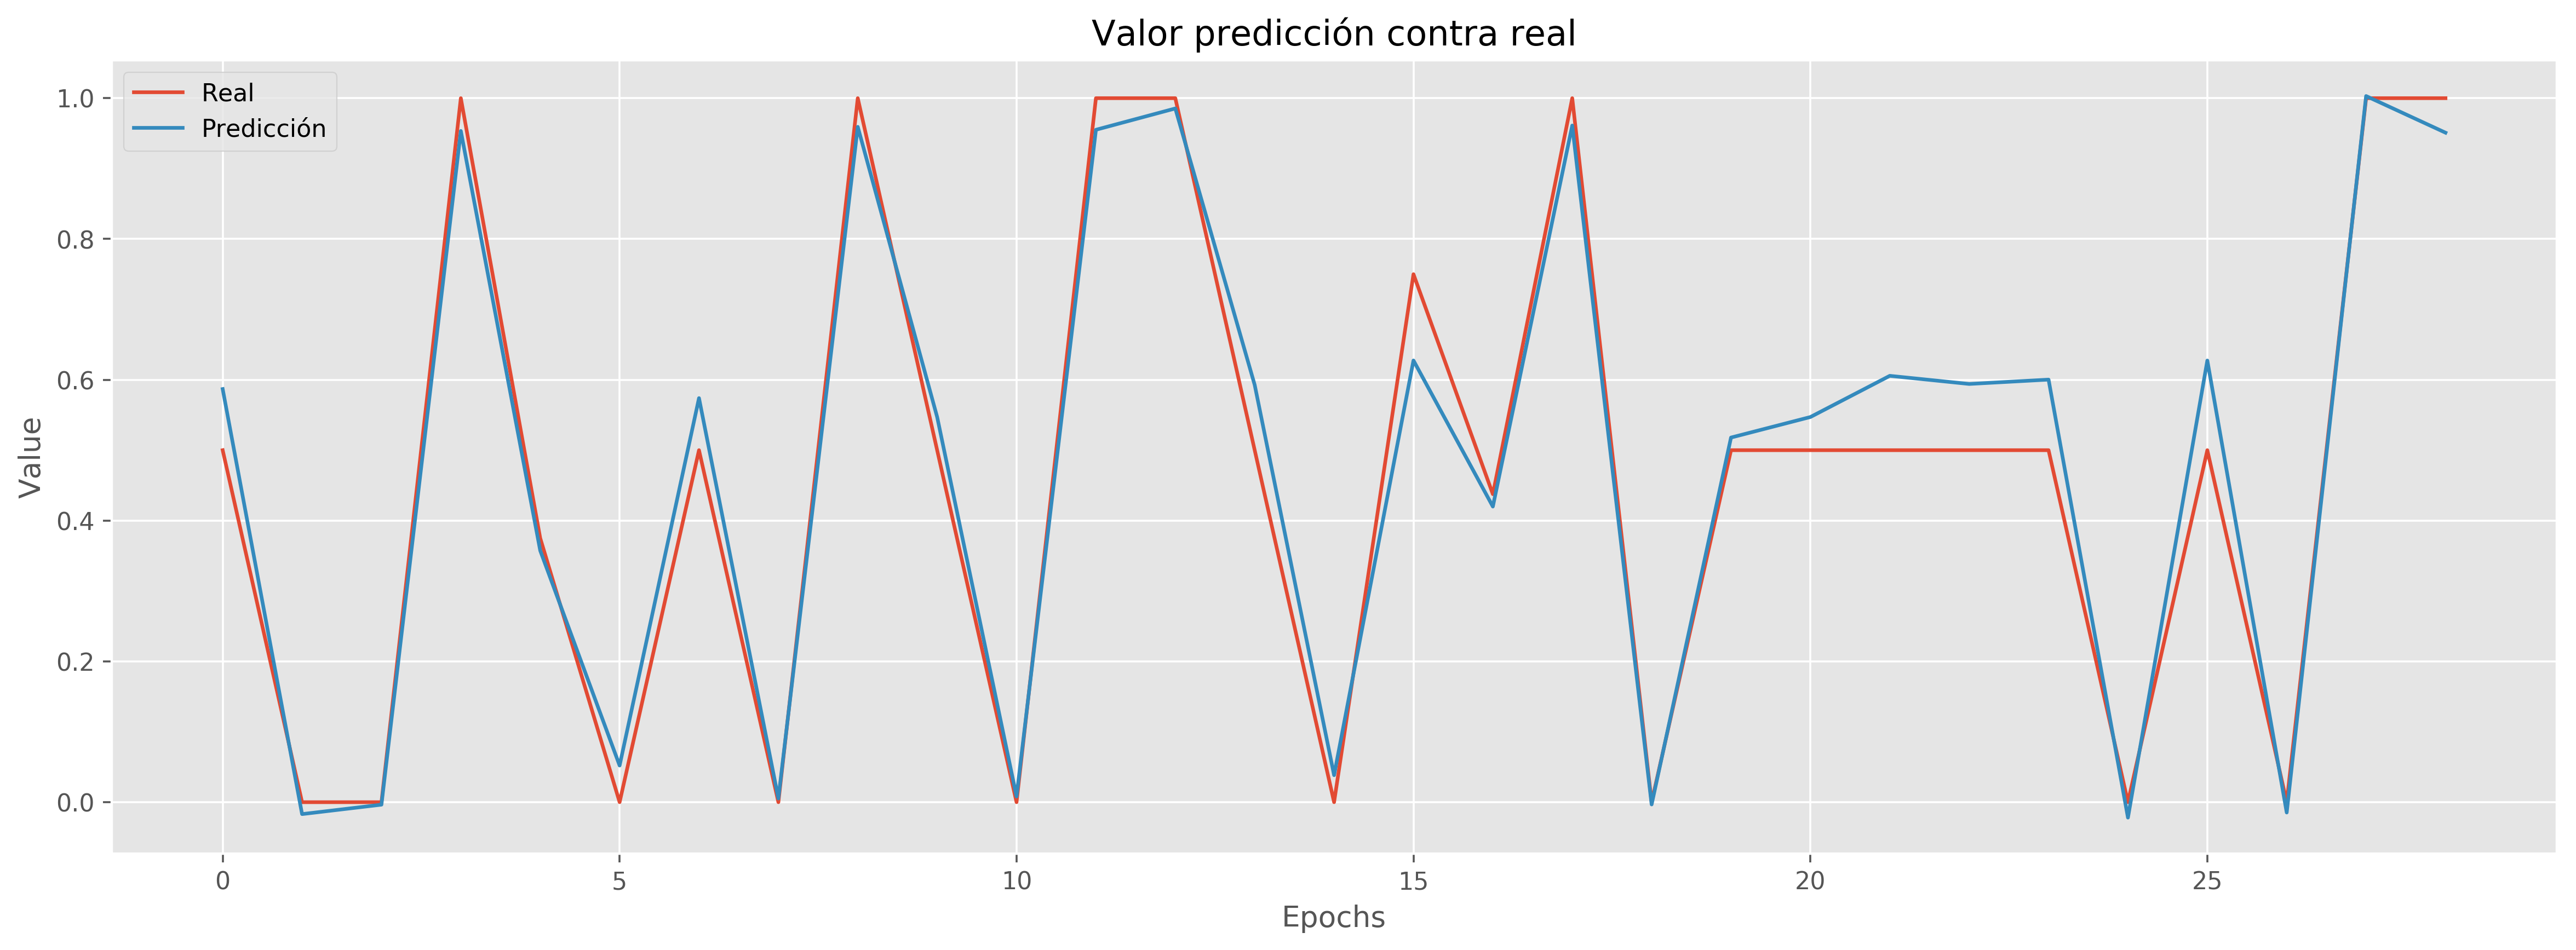

In [134]:
pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[0:100,], label='Real')
pyplot.plot(predicted[0:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()